In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
sys.path.append("../src")

In [2]:
preselection_configs = [file for file in os.listdir("/afs/desy.de/user/s/spatarod/QUBO-V2/configuration/preselection/") 
                        if "c_" in file]
qubo_configs_paper = ['VQE_IdealQasmSim_3q_TwoLocal_NFT.yaml',
                      'VQE_IdealQasmSim_5q_TwoLocal_NFT.yaml',
                      'VQE_IdealQasmSim_7q_TwoLocal_NFT.yaml',
                      'VQE_IdealQasmSim_10q_TwoLocal_NFT.yaml',
                      'VQE_IdealQasmSim_12q_TwoLocal_NFT.yaml',
                      'VQE_IdealQasmSim_16q_TwoLocal_NFT.yaml']
qubo_configs = qubo_configs_paper

In [3]:
def hms_string(sec_elapsed):
    """Nicely formatted time string.
    :param sec_elapsed time in ms
    :return
    hh:mm:ss.msms
    """
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return "{}:{:>02}:{:>05.2f}".format(h, m, s)

In [4]:
prefix = "/nfs/dust/luxe/user/spatarod/towards_paper/e-laser/phase-0/gpc/"
xi = 5.0
preselection = "-c_4"


truth_minimum_energy_5q = []
truth_minimum_energy_7q = []
truth_minimum_energy_10q = []
truth_minimum_energy_12q = []
truth_minimum_energy_16q = []


iteration_for_threshold_energy_5q = []
iteration_for_threshold_energy_7q = []
iteration_for_threshold_energy_10q = []
iteration_for_threshold_energy_12q = []
iteration_for_threshold_energy_16q = []


iteration_time_5q = []
iteration_time_7q = []
iteration_time_10q = []
iteration_time_12q = []
iteration_time_16q = []


solving_time_subqubos_5q = []
solving_time_subqubos_7q = []
solving_time_subqubos_10q = []
solving_time_subqubos_12q = []
solving_time_subqubos_16q = []


solving_success_subqubos_5q = []
solving_success_subqubos_7q = []
solving_success_subqubos_10q = []
solving_success_subqubos_12q = []
solving_success_subqubos_16q = []


  
threshold = 0.95

In [94]:

for folder in os.listdir(f"{prefix}{xi}/smeared/"):
    if preselection in folder:
        for qubo in os.listdir(f"{prefix}{xi}/smeared/{folder}"):
            if "_".join(qubo.split("_")[1:]) in [qubo_config.split(".")[0] for qubo_config in qubo_configs]:
                try:
                    data = np.load(f"{prefix}{xi}/smeared/{folder}/{qubo}/qubo_log.npy", allow_pickle=True)

                except:
                    pass
                          
                            
                if "5q" in qubo:  
                    if len(data[()]["hamiltonian"][0][0])!= 5:
                        continue
                        
                    timed = 0
                    truth_minimum_energy_5q.append(data[()]["truth minimum energy"])

                    solving_success_subqubos_5q.append(data[()]["compare to analytical solution"].values())
                    solving_time_subqubos_5q.append(data[()]["time tracking subQUBOs"].values())
                        
                    for iteration, energy, time in zip(data[()]["energy"].keys(), 
                                                       data[()]["energy"].values(),
                                                       data[()]["time tracking qubo iteration"].values()):


                        timed += time
                        if energy / data[()]["truth minimum energy"] > threshold:
                            iteration_for_threshold_energy_5q.append(int(iteration))
                            iteration_time_5q.append(timed)                  
                            break
                            
                            
                if "7q" in qubo:
                    if len(data[()]["hamiltonian"][0][0])!= 7:
                        continue      
                        
                    timed = 0
                    truth_minimum_energy_7q.append(data[()]["truth minimum energy"])

                    solving_success_subqubos_7q.append(data[()]["compare to analytical solution"].values())
                    solving_time_subqubos_7q.append(data[()]["time tracking subQUBOs"].values())
                        
                    for iteration, energy, time in zip(data[()]["energy"].keys(), 
                                                       data[()]["energy"].values(),
                                                       data[()]["time tracking qubo iteration"].values()):


                        timed += time
                        if energy / data[()]["truth minimum energy"] > threshold:
                            iteration_for_threshold_energy_7q.append(int(iteration))
                            iteration_time_7q.append(timed)                  
                            break    
                            
                            
                            
                if "10q" in qubo:
                    if len(data[()]["hamiltonian"][0][0])!= 10:
                        continue
 
                    timed = 0
                    truth_minimum_energy_10q.append(data[()]["truth minimum energy"])

                    solving_success_subqubos_10q.append(data[()]["compare to analytical solution"].values())
                    solving_time_subqubos_10q.append(data[()]["time tracking subQUBOs"].values())
                        
                    for iteration, energy, time in zip(data[()]["energy"].keys(), 
                                                       data[()]["energy"].values(),
                                                       data[()]["time tracking qubo iteration"].values()):


                        timed += time
                        if energy / data[()]["truth minimum energy"] > threshold:
                            iteration_for_threshold_energy_10q.append(int(iteration))
                            iteration_time_10q.append(timed)                  
                            break    
                            
                            
                            
                if "12q" in qubo:
                    if len(data[()]["hamiltonian"][0][0])!= 12:
                        print("ERROR")
                        continue
                        
                    timed = 0
                    truth_minimum_energy_12q.append(data[()]["truth minimum energy"])

                    solving_success_subqubos_12q.append(data[()]["compare to analytical solution"].values())
                    solving_time_subqubos_12q.append(data[()]["time tracking subQUBOs"].values())
                        
                    for iteration, energy, time in zip(data[()]["energy"].keys(), 
                                                       data[()]["energy"].values(),
                                                       data[()]["time tracking qubo iteration"].values()):


                        timed += time
                        if energy / data[()]["truth minimum energy"] > threshold:
                            iteration_for_threshold_energy_12q.append(int(iteration))
                            iteration_time_12q.append(timed)                  
                            break    
                      
                if "16q" in qubo:
                    if len(data[()]["hamiltonian"][0][0])!= 16:
                        continue           
                        
                    timed = 0
                    truth_minimum_energy_16q.append(data[()]["truth minimum energy"])

                    solving_success_subqubos_16q.append(data[()]["compare to analytical solution"].values())
                    solving_time_subqubos_16q.append(data[()]["time tracking subQUBOs"].values())
                        
                    for iteration, energy, time in zip(data[()]["energy"].keys(), 
                                                       data[()]["energy"].values(),
                                                       data[()]["time tracking qubo iteration"].values()):


                        timed += time
                        if energy / data[()]["truth minimum energy"] > threshold:
                            iteration_for_threshold_energy_16q.append(int(iteration))
                            iteration_time_16q.append(timed)                  
                            break    

In [32]:
print("Convergence time (reaching < 95% ground state energy) in hh:mm:ss.msms")

print(f"Sub-QUBO size = 5: {hms_string(np.mean(iteration_time_5q))} +/- {hms_string(np.std(iteration_time_5q))} after approximately {1 + np.around(np.mean(iteration_for_threshold_energy_5q), 3)} +/- {np.around(np.std(iteration_for_threshold_energy_5q), 3)} iterations")
print(f"Sub-QUBO size = 7: {hms_string(np.mean(iteration_time_7q))} +/- {hms_string(np.std(iteration_time_7q))} after approximately {1 + np.around(np.mean(iteration_for_threshold_energy_7q), 3)} +/- {np.around(np.std(iteration_for_threshold_energy_7q), 3)} iterations")
print(f"Sub-QUBO size = 10: {hms_string(np.mean(iteration_time_10q))} +/- {hms_string(np.std(iteration_time_10q))} after approximately {1 + np.around(np.mean(iteration_for_threshold_energy_10q), 3)} +/- {np.around(np.std(iteration_for_threshold_energy_10q), 3)} iterations")
print(f"Sub-QUBO size = 12: {hms_string(np.mean(iteration_time_12q))} +/- {hms_string(np.std(iteration_time_12q))} after approximately {1 + np.around(np.mean(iteration_for_threshold_energy_12q), 3)} +/- {np.around(np.std(iteration_for_threshold_energy_12q), 3)} iterations")
# print(f"Sub-QUBO size = 16: {hms_string(np.mean(iteration_time_16_q))} +/- {hms_string(np.std(iteration_time_16_q))} after approximately {1 + np.around(np.mean(iteration_for_95_energy_12_q), 3)} iterations")

Convergence time (reaching < 95% ground state energy) in hh:mm:ss.msms
Sub-QUBO size = 5: 5:03:25.23 +/- 1:19:08.70 after approximately 2.0 +/- 0.0 iterations
Sub-QUBO size = 7: 4:32:22.58 +/- 2:09:33.49 after approximately 2.0 +/- 0.0 iterations
Sub-QUBO size = 10: 4:39:13.23 +/- 0:47:04.75 after approximately 2.0 +/- 0.0 iterations
Sub-QUBO size = 12: 6:06:38.58 +/- 1:12:36.70 after approximately 3.0 +/- 0.0 iterations


In [7]:
subQUBO_size = [5, 7, 10, 12]

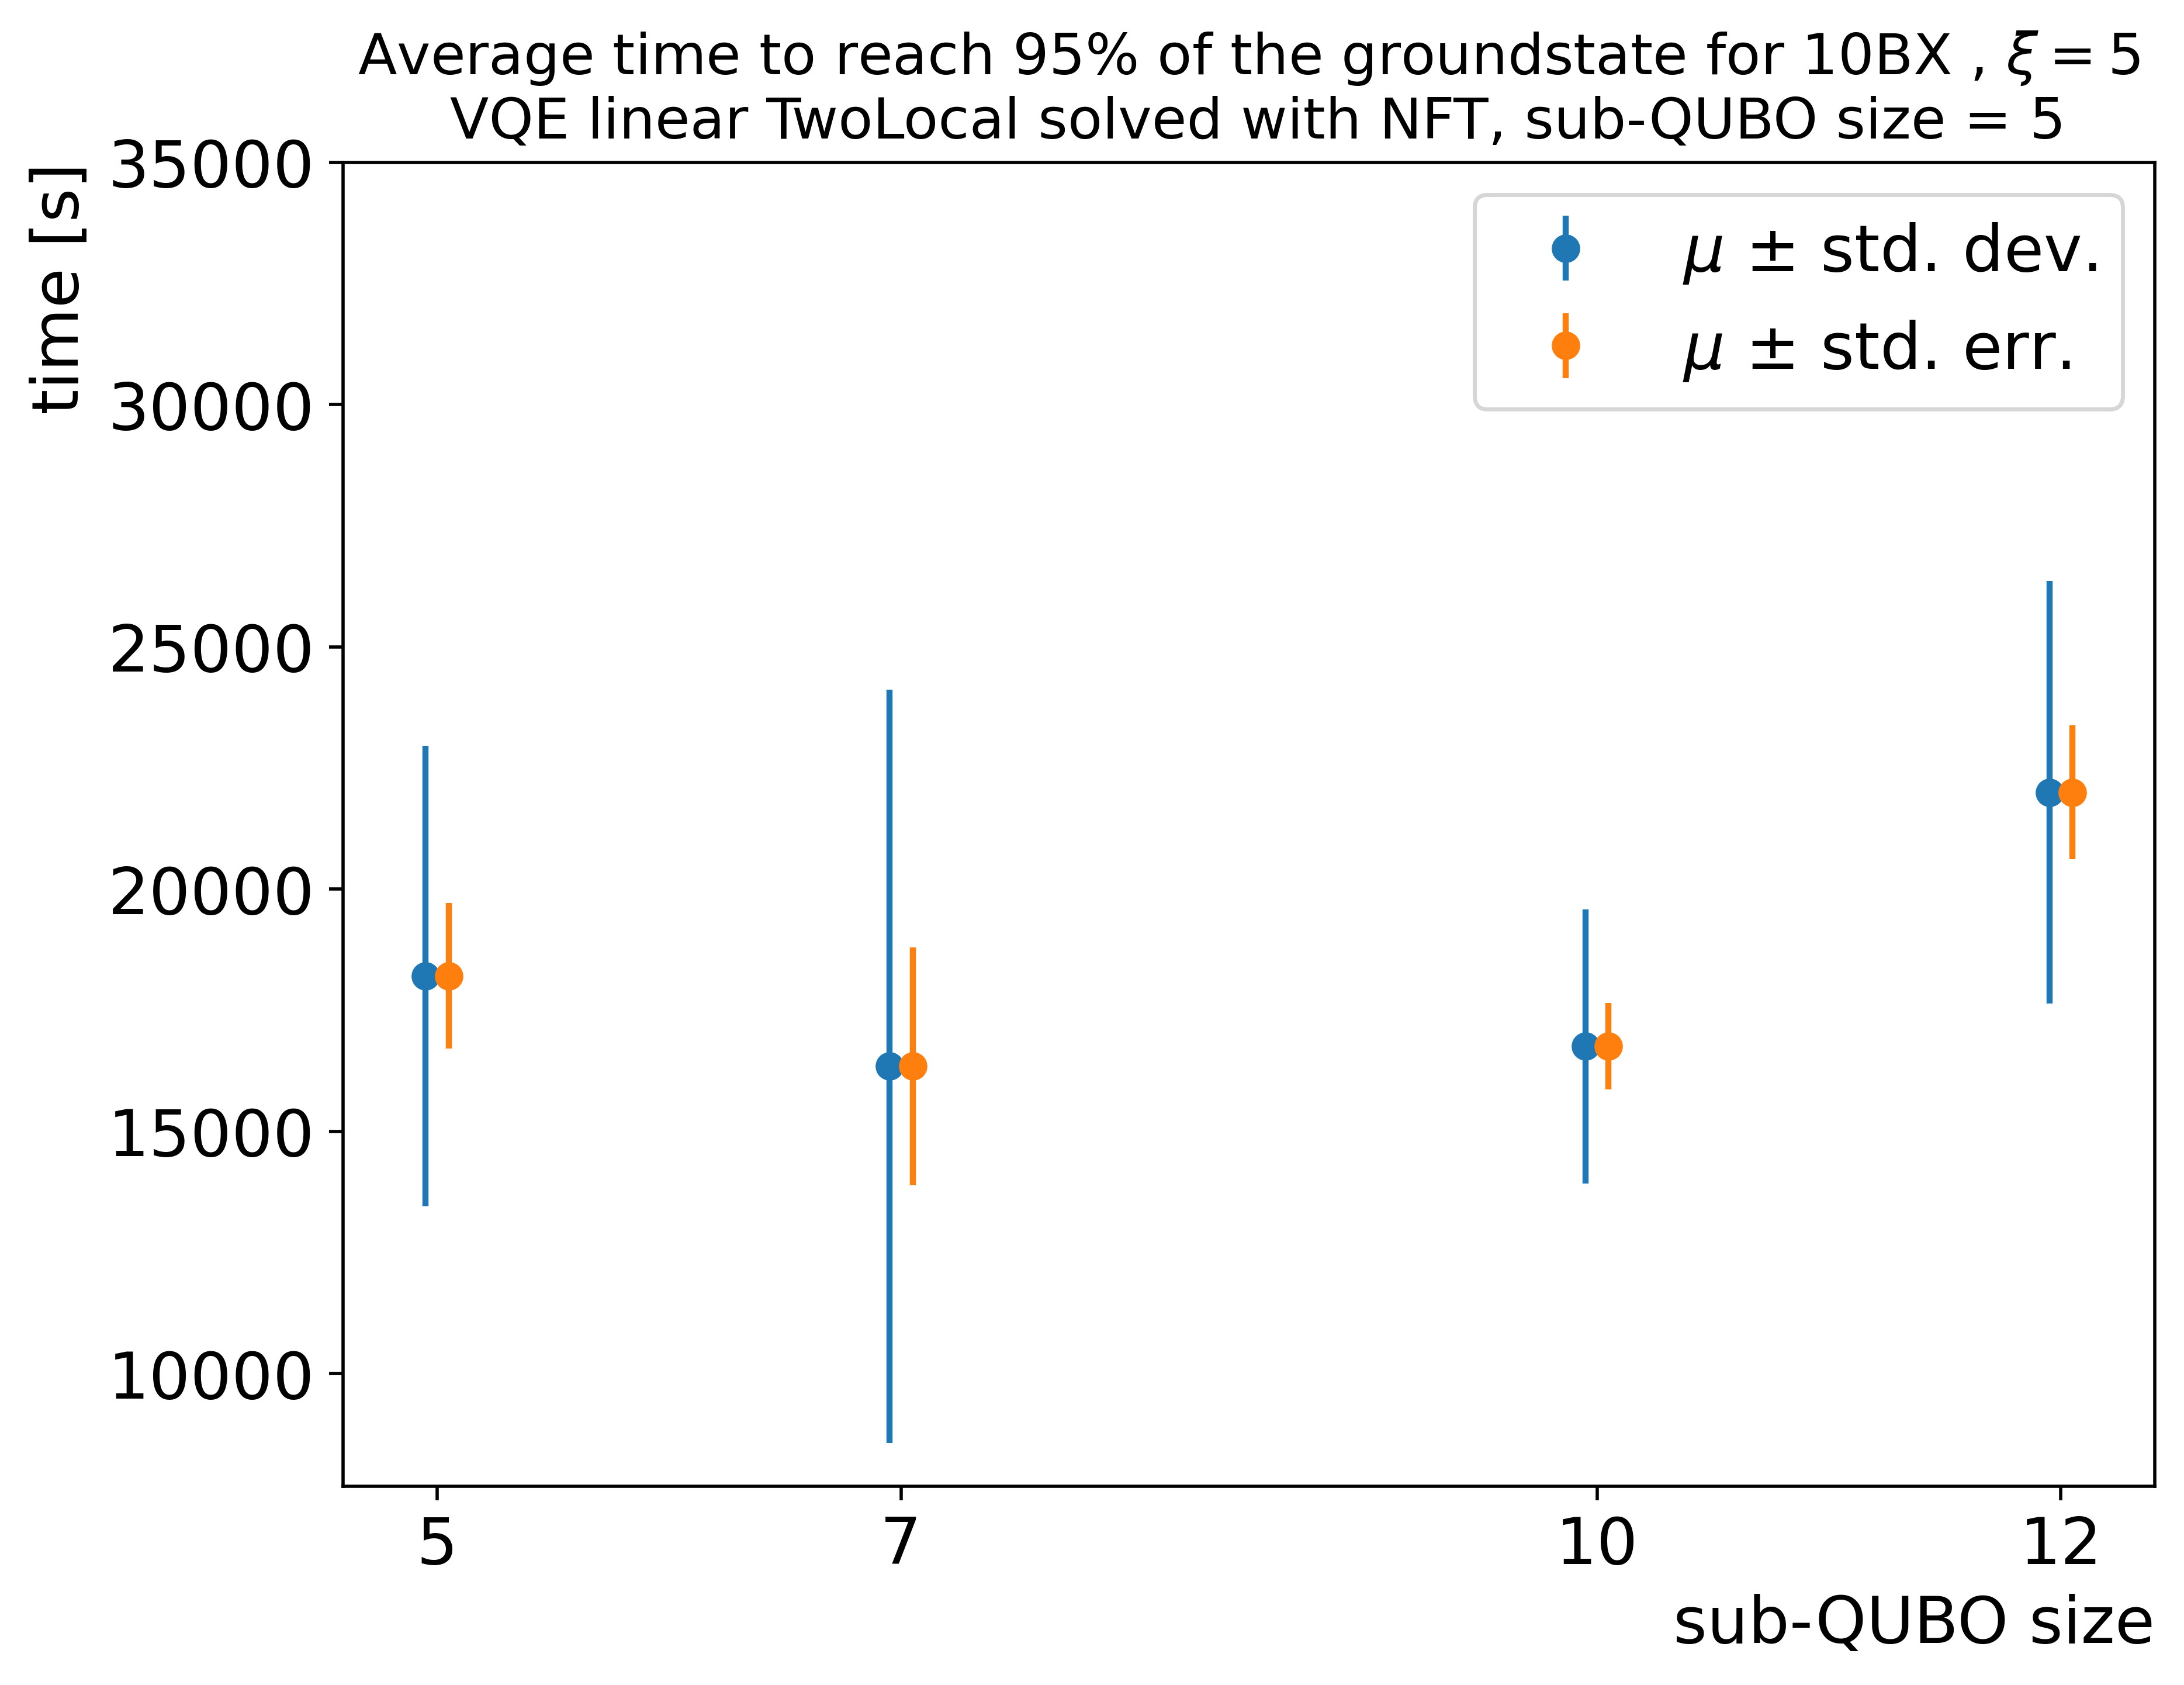

In [31]:
plt.figure(figsize=(8, 6), dpi=500)
plt.errorbar(x=[4.95, 6.95, 9.95, 11.95],
             y=[np.mean(array) for array in [iteration_time_5q,
                                             iteration_time_7q,
                                             iteration_time_10q,
                                             iteration_time_12q]],
             yerr=[np.std(array) for array in [iteration_time_5q,
                                               iteration_time_7q,
                                               iteration_time_10q,
                                               iteration_time_12q]],
            label="$\mu$ $\pm$ std. dev.",
            linestyle="",
            marker="o")
plt.errorbar(x=[5.05, 7.05, 10.05, 12.05],
             y=[np.mean(array)for array in [iteration_time_5q,
                                            iteration_time_7q,
                                            iteration_time_10q,
                                            iteration_time_12q]],
             yerr=[np.std(array) * 1 / np.sqrt(len(array))  for array in [iteration_time_5q,
                                                                          iteration_time_7q,
                                                                          iteration_time_10q,
                                                                          iteration_time_12q]],
            label="$\mu$ $\pm$ std. err.",
            linestyle="",
            marker="o")
plt.title(r"Average time to reach 95% of the groundstate for 10BX , $\xi=5$" + 
          "\n VQE linear TwoLocal solved with NFT, sub-QUBO size = 5", fontsize=14)  
plt.legend(loc="best", fontsize=16)
plt.xticks([5, 7, 10, 12], fontsize=16)
plt.yticks([1e4, 1.5e4, 2e4, 2.5e4, 3e4, 3.5e4], fontsize=16)
plt.xlabel("sub-QUBO size", fontsize=16, loc="right")
plt.ylabel("time [s]", fontsize=16, loc="top")
plt.savefig("average_time.pdf", bbox_inches='tight')
plt.savefig("average_time.jpg", bbox_inches='tight')

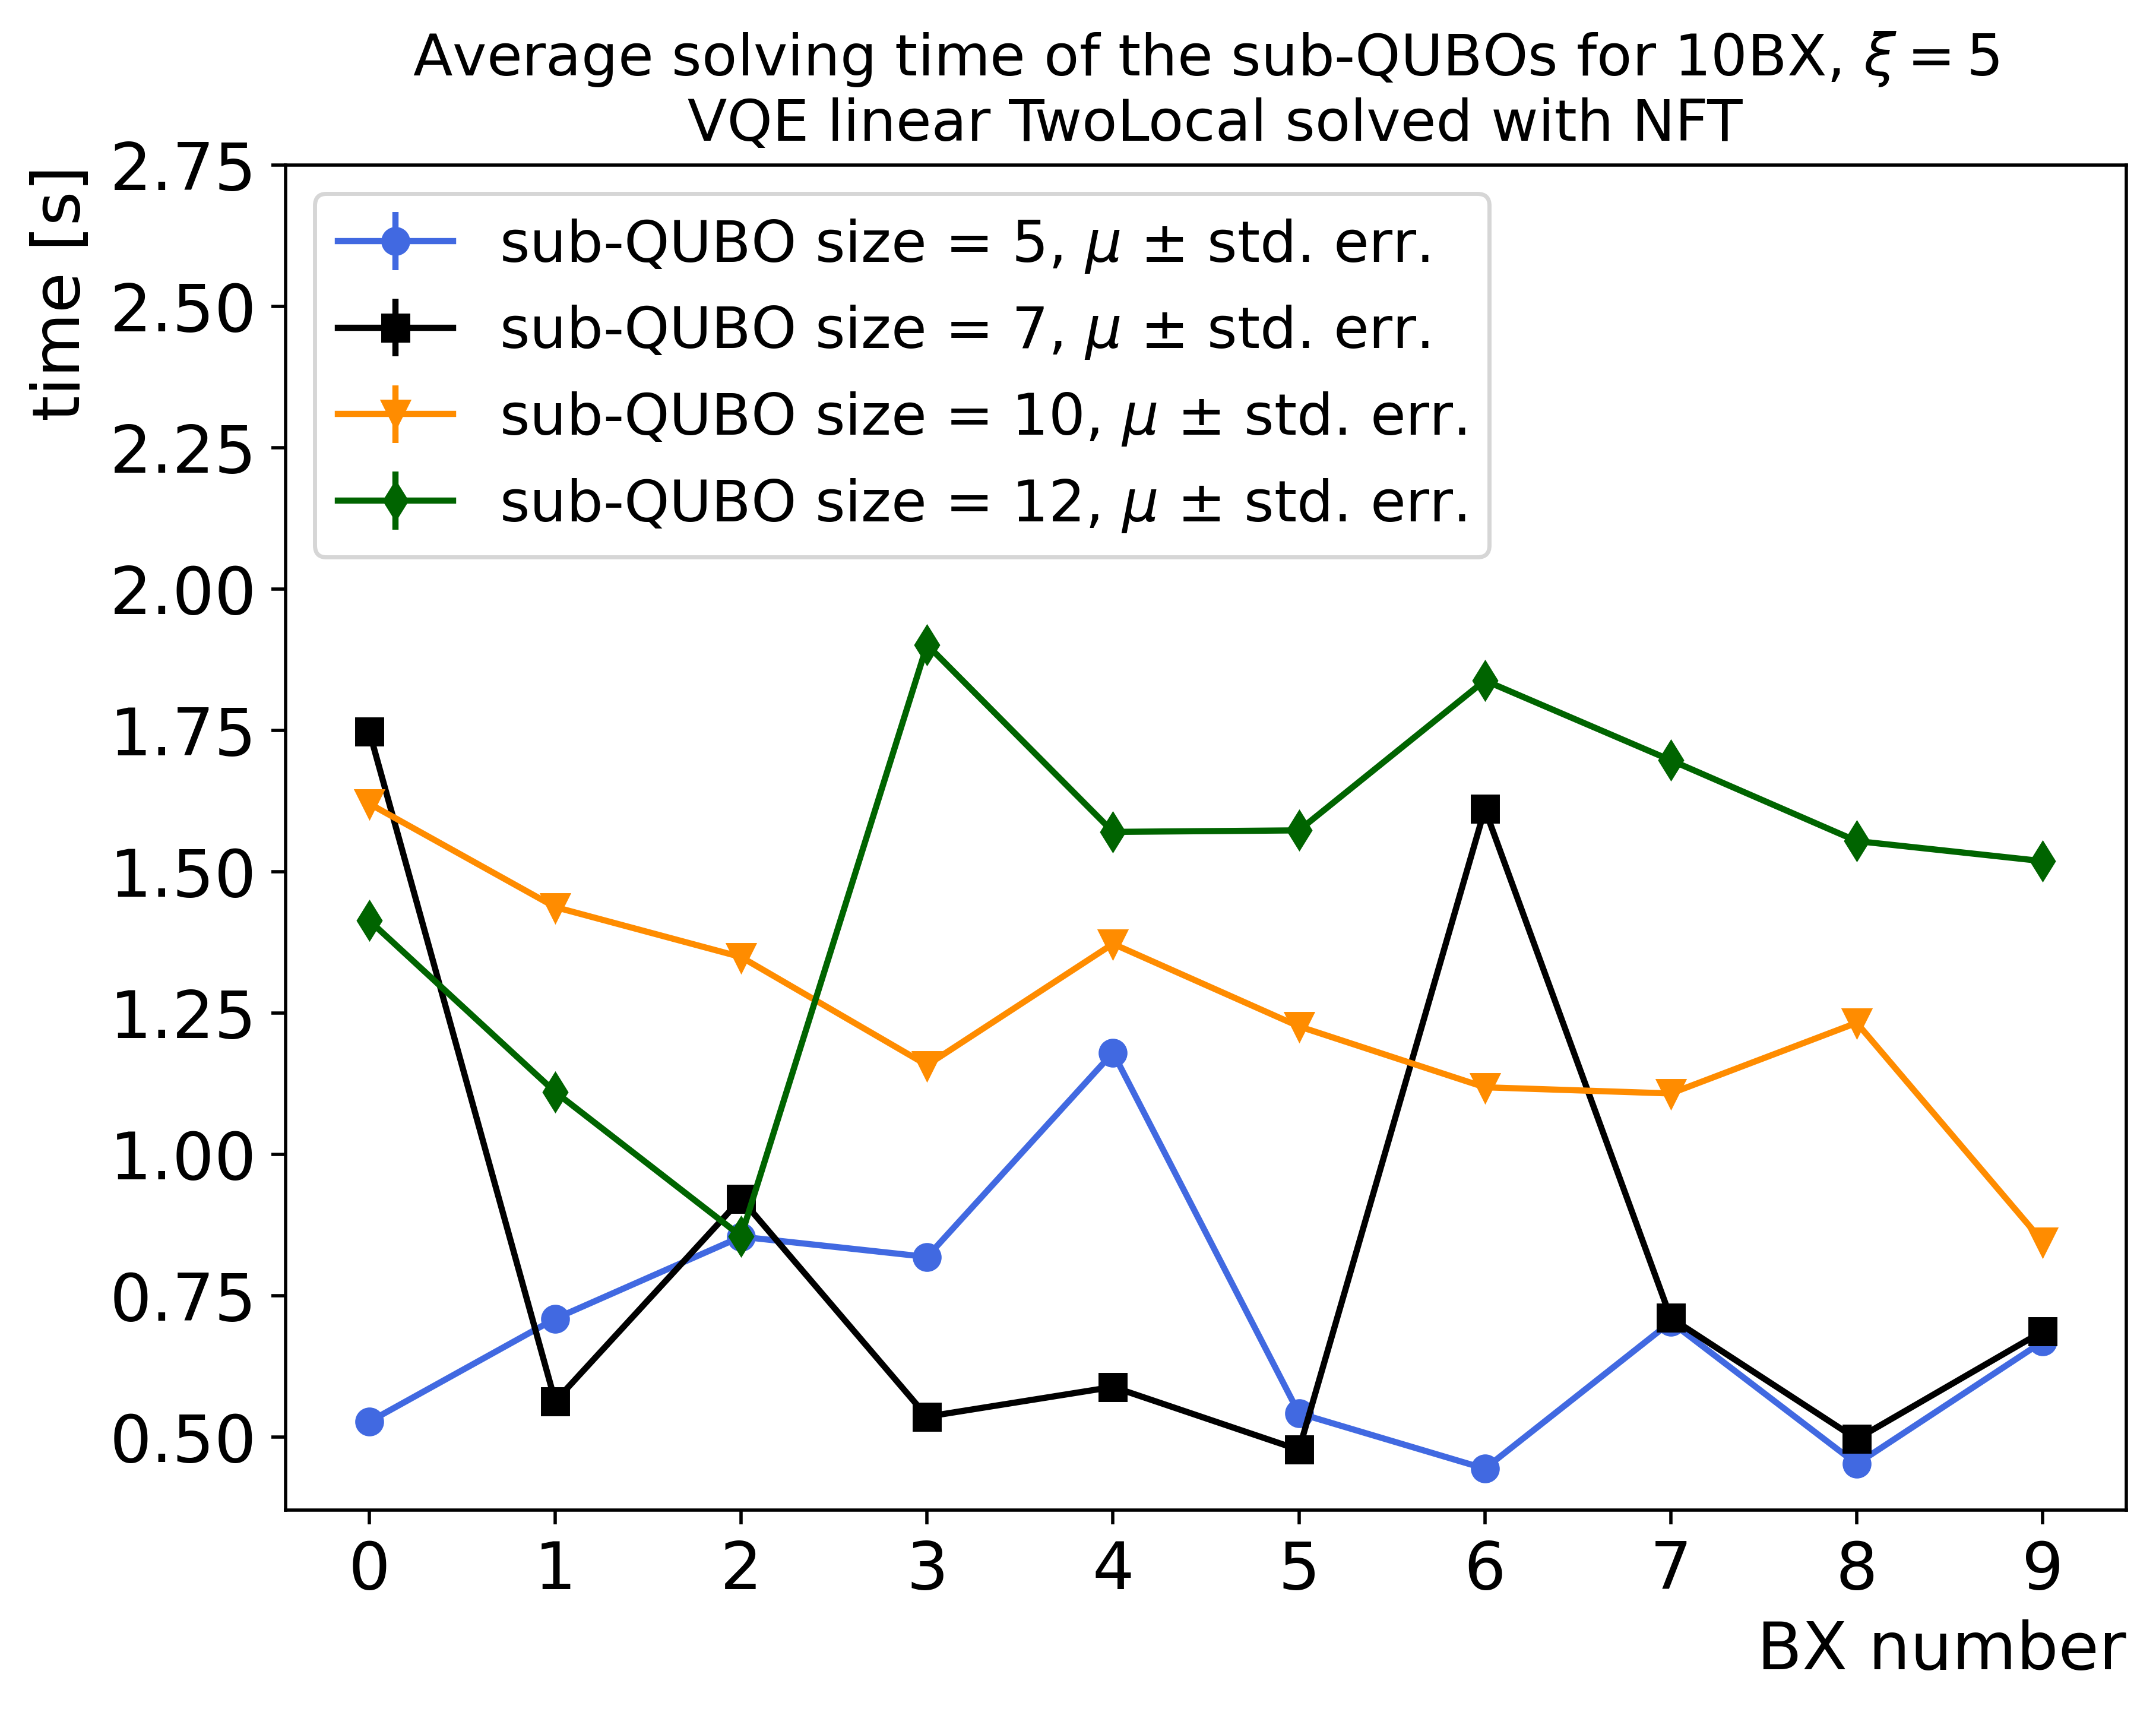

In [30]:
plt.figure(figsize=(8,6), dpi=500)
plt.errorbar(x=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
             y=[np.mean(list(d_values)) for d_values in solving_time_subqubos_5q],
             yerr=[np.std(list(d_values)) * 1 / len(list(d_values))  
                   for d_values in solving_time_subqubos_5q],
             label="sub-QUBO size = 5, $\mu$ $\pm$ std. err.",
             linestyle="-",
             color="royalblue",
             marker="o")
plt.errorbar(x=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
             y=[np.mean(list(d_values)) for d_values in solving_time_subqubos_7q],
             yerr=[np.std(list(d_values)) * 1 / np.sqrt(len(list(d_values)))    
                   for d_values in solving_time_subqubos_7q],
             label="sub-QUBO size = 7, $\mu$ $\pm$ std. err.",
             linestyle="-",
             color="black",
             marker="s")
plt.errorbar(x=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
             y=[np.mean(list(d_values)) for d_values in solving_time_subqubos_10q],
             yerr=[np.std(list(d_values)) * 1 / np.sqrt(len(list(d_values)))  
                   for d_values in solving_time_subqubos_10q],
             label="sub-QUBO size = 10, $\mu$ $\pm$ std. err.",
             linestyle="-",
             color="darkorange",
             marker="v")
plt.errorbar(x=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
             y=[np.mean(list(d_values)) for d_values in solving_time_subqubos_12q],
             yerr=[np.std(list(d_values)) * 1 / np.sqrt(len(list(d_values)))  
                   for d_values in solving_time_subqubos_12q],
             label="sub-QUBO size = 12, $\mu$ $\pm$ std. err.",
             linestyle="-",
             color="darkgreen",
             marker="d")

plt.title(r"Average solving time of the sub-QUBOs for 10BX, $\xi=5$" +           
          "\n VQE linear TwoLocal solved with NFT", fontsize=14) 
plt.legend(loc="upper left", fontsize=14)
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], fontsize=16)
plt.yticks([0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75],fontsize=16)
plt.xlabel("BX number", fontsize=16, loc="right")
plt.ylabel("time [s]", fontsize=16, loc="top")
plt.savefig("average_time_subQUBO.pdf", bbox_inches='tight')
plt.savefig("average_time_subQUBO.jpg", bbox_inches='tight')

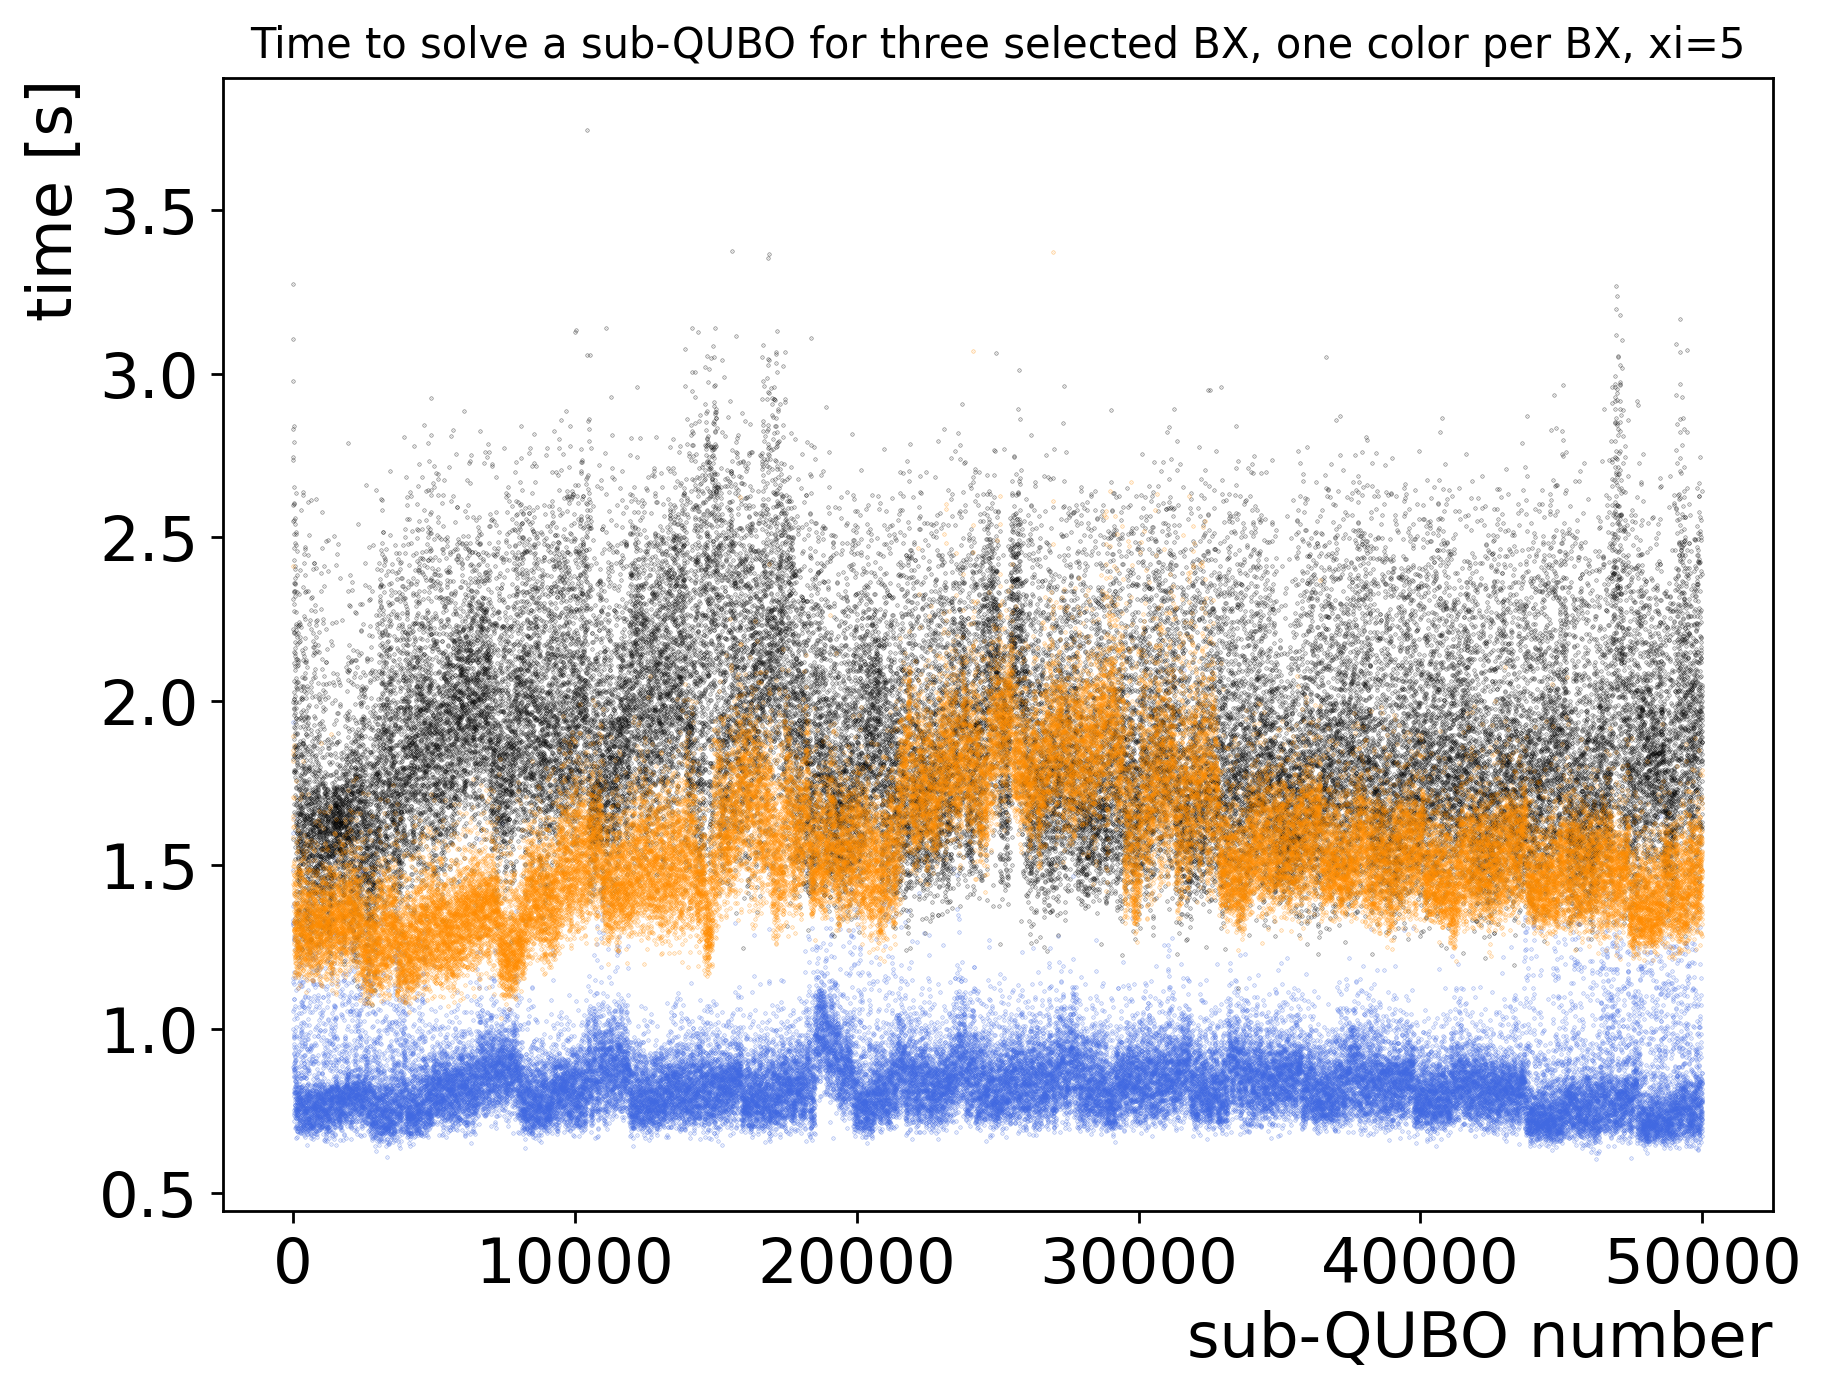

In [33]:
subqubo_BX2_sub_qubo_size_12 = [s for s in list(solving_time_subqubos_12q[2]) if s < 4][0:50000]
subqubo_BX3_sub_qubo_size_12 = [s for s in list(solving_time_subqubos_12q[3]) if s < 4][0:50000]
subqubo_BX8_sub_qubo_size_12 = [s for s in list(solving_time_subqubos_12q[8]) if s < 4][0:50000]




plt.figure(figsize=(8,6), dpi=250)
plt.plot([i for i in range(len(subqubo_BX2_sub_qubo_size_12))], 
         subqubo_BX2_sub_qubo_size_12,
         linestyle="",
         marker="o",
         markersize=0.2,
         alpha=0.5,
         color="royalblue")
plt.plot([i for i in range(len(subqubo_BX3_sub_qubo_size_12))], 
         subqubo_BX3_sub_qubo_size_12,
         linestyle="",
         marker="o",
         markersize=0.2,
         alpha=0.5,
         color="black")
plt.plot([i for i in range(len(subqubo_BX8_sub_qubo_size_12))], 
         subqubo_BX8_sub_qubo_size_12,
         linestyle="",
         marker="o",
         markersize=0.2,
         alpha=0.5, 
         color="darkorange")
plt.title("Time to solve a sub-QUBO for three selected BX, one color per BX, xi=5")
plt.xlabel("sub-QUBO number", fontsize=18, loc="right")
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel("time [s]", fontsize=18, loc="top")
plt.savefig("sub-QUBO_solving_time_10BX.pdf", bbox_inches='tight')
plt.savefig("sub-QUBO_solving_time_10BX.jpg", bbox_inches='tight')

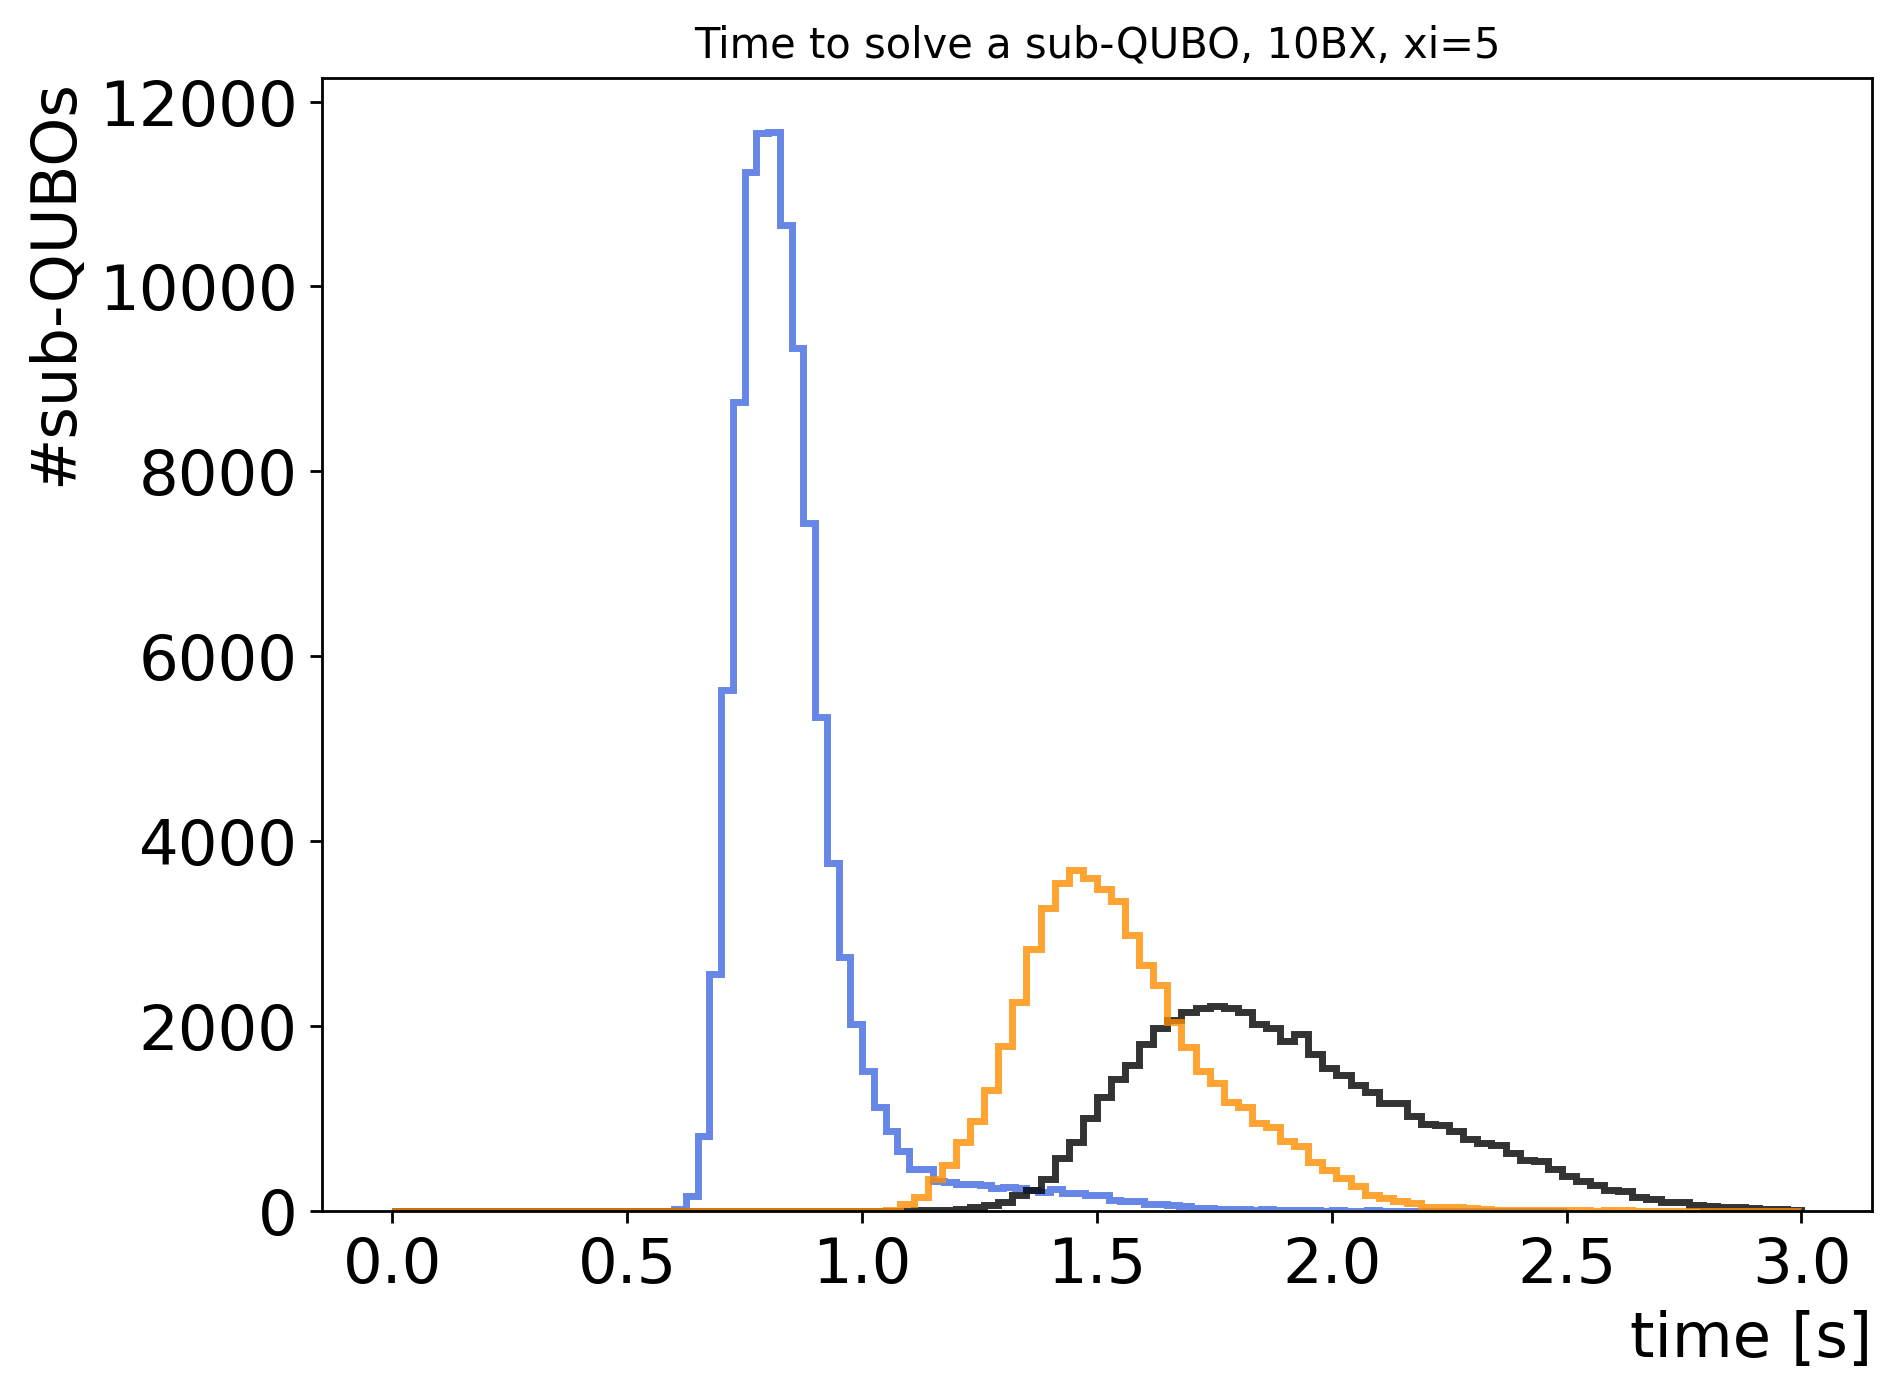

In [27]:
plt.figure(figsize=(8,6), dpi=250)
plt.hist(subqubo_BX2_sub_qubo_size_12, 
         bins=100, 
         range=(0, 2.5),
         alpha=0.8,
         color="royalblue",
         linewidth=2.0,
         histtype="step")
plt.hist(subqubo_BX3_sub_qubo_size_12, 
         bins=100, 
         range=(0, 3.0),
         alpha=0.8,
         color="black",
         linewidth=2.0,
         histtype="step")
plt.hist(subqubo_BX8_sub_qubo_size_12, 
         bins=100, 
         range=(0, 3.0),
         alpha=0.8,
         color="darkorange",
         linewidth=2.0,
         histtype="step")
plt.title("Time to solve a sub-QUBO, 10BX, xi=5")
plt.xlabel("time [s]", fontsize=18, loc="right")
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel("#sub-QUBOs", fontsize=18, loc="top")
plt.savefig("hist_sub-QUBO_solving_time.pdf", bbox_inches='tight')
plt.savefig("hist_sub-QUBO_solving_time.jpg", bbox_inches='tight')

In [40]:
solve_success_sub_QUBO_5q = []
solve_success_sub_QUBO_7q = []
solve_success_sub_QUBO_10q = []
solve_success_sub_QUBO_12q = []

In [52]:
for value in solving_success_subqubos_5q:
    for inner_value in value:
        if inner_value:
            solve_success_sub_QUBO_5q.append(1)
        else:
            solve_success_sub_QUBO_5q.append(0)
            
for value in solving_success_subqubos_7q:
    for inner_value in value:
        try:
            if inner_value:
                solve_success_sub_QUBO_7q.append(1)
            else:
                solve_success_sub_QUBO_7q.append(0)
        except ValueError:
            if np.array(inner_value).all():
                solve_success_sub_QUBO_7q.append(1)
            else:
                solve_success_sub_QUBO_7q.append(0)
        
for value in solving_success_subqubos_10q:
    for inner_value in value:
        if inner_value:
            solve_success_sub_QUBO_10q.append(1)
        else:
            solve_success_sub_QUBO_10q.append(0)
            
for value in solving_success_subqubos_12q:
    for inner_value in value:
        if inner_value:
            solve_success_sub_QUBO_12q.append(1)
        else:
            solve_success_sub_QUBO_12q.append(0)

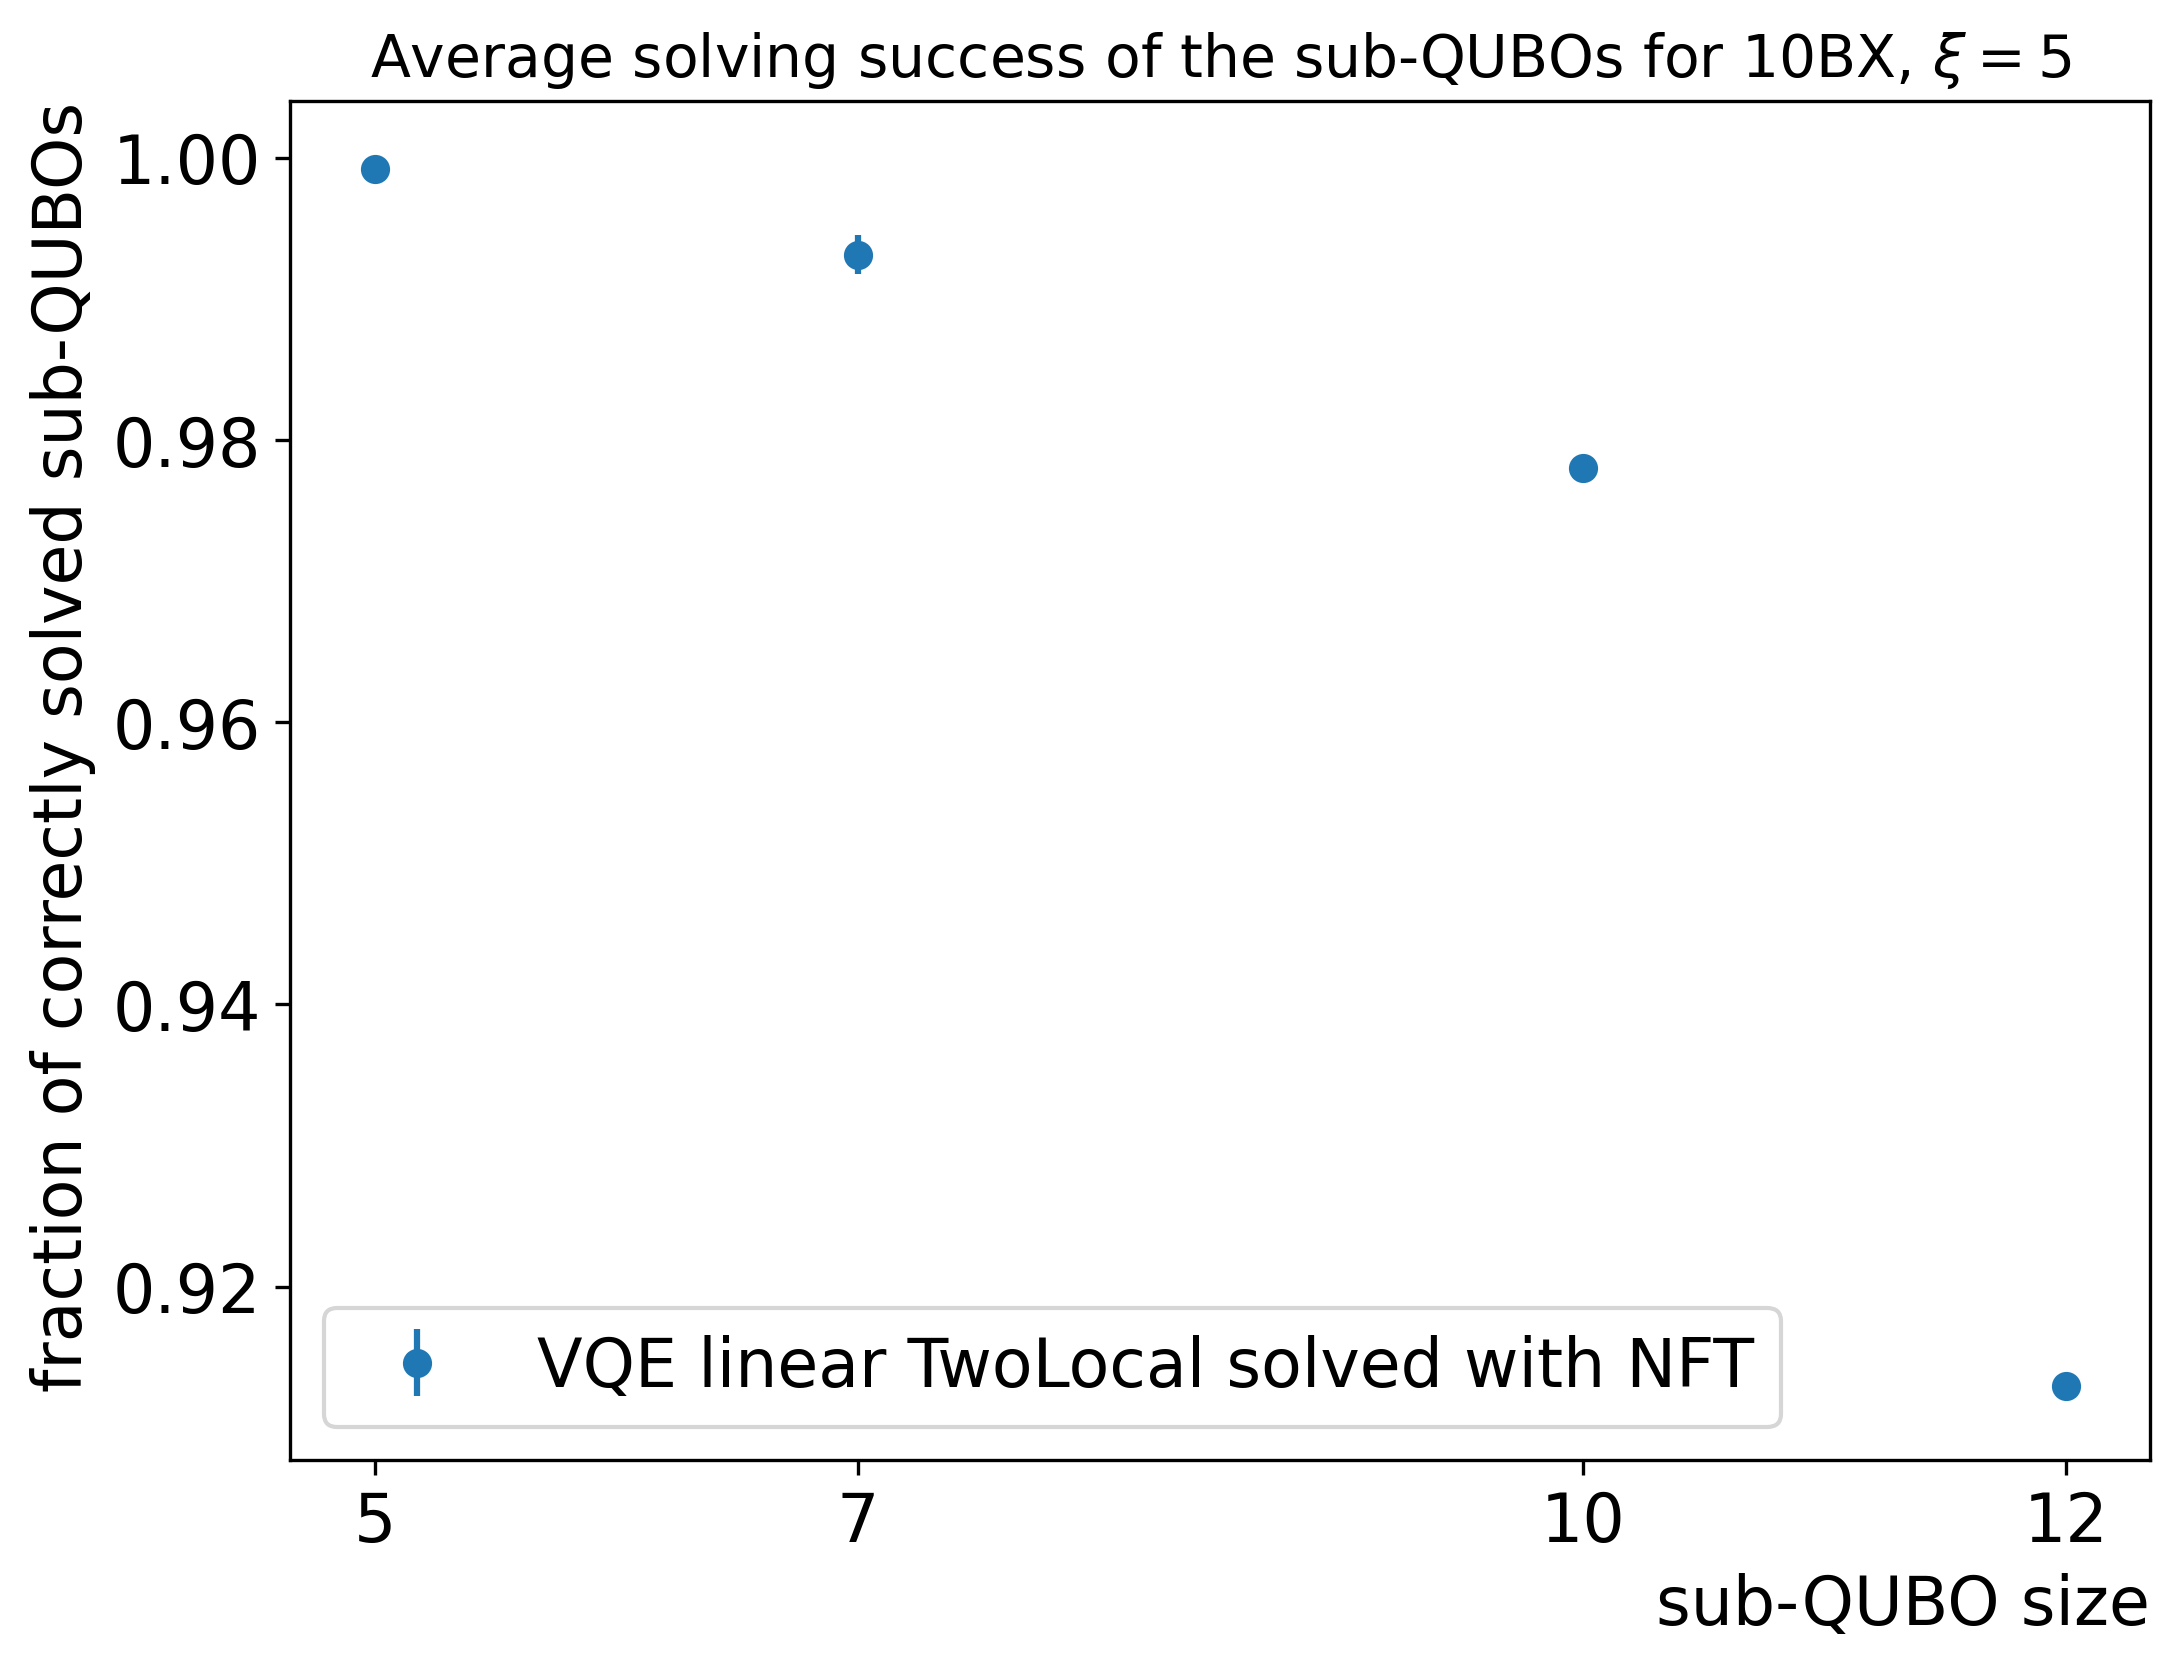

In [58]:
plt.figure(figsize=(8,6), dpi=300)
plt.errorbar(x=subQUBO_size,
             y=[sum(solve_success_sub_QUBO_5q) / len(solve_success_sub_QUBO_5q),
                sum(solve_success_sub_QUBO_7q) / len(solve_success_sub_QUBO_7q),
                sum(solve_success_sub_QUBO_10q) / len(solve_success_sub_QUBO_10q),
                sum(solve_success_sub_QUBO_12q) / len(solve_success_sub_QUBO_12q)],
             yerr=[np.sqrt(sum(solve_success_sub_QUBO_5q)) / 
                   len(solve_success_sub_QUBO_5q),  
                   
                   np.sqrt(sum(solve_success_sub_QUBO_7q)) / 
                   len(solve_success_sub_QUBO_7q), 
                   
                   np.sqrt(sum(solve_success_sub_QUBO_10q)) / 
                   len(solve_success_sub_QUBO_10q), 
                   
                   np.sqrt(sum(solve_success_sub_QUBO_12q)) / 
                   len(solve_success_sub_QUBO_12q)],
            label="VQE linear TwoLocal solved with NFT",
            linestyle="",
            marker="o")
plt.title(r"Average solving success of the sub-QUBOs for 10BX, $\xi=5$", fontsize=14)  
plt.legend(loc="best", fontsize=16)
plt.xticks([5, 7, 10, 12],fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("sub-QUBO size", fontsize=16, loc="right")
plt.ylabel("fraction of correctly solved sub-QUBOs", fontsize=16, loc="top")
plt.savefig("average_solving_success.pdf", bbox_inches='tight')
plt.savefig("average_solving_success.jpg", bbox_inches='tight')

In [84]:
data[()]["hamiltonian"][200][1] < 0


array([[False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False]])

In [95]:
no_connection = 0
actual_connection = 0
number_of_subqubos = 0

for ham in data[()]["hamiltonian"].values():
    if (ham[1] == np.zeros((7, 7))).all():
        no_connection += 1
    if (ham[1] < 0).any():
        actual_connection += 1
    number_of_subqubos += 1
        

In [96]:
print(number_of_subqubos)
print(no_connection)
print(actual_connection)

6358
6022
31


In [ ]:
solving_success_12q

SyntaxError: invalid syntax (<ipython-input-89-a0bfaba30f63>, line 1)